In [3]:
import numpy as np

In [4]:
rand = np.random.RandomState(42)
x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [5]:
ind =[3, 7, 4]
x[ind]

array([71, 86, 60])

In [6]:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [7]:
# fancy indexing also works in multiple dimensions
X = np.arange(12).reshape(3,4)
print(X)
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


array([ 2,  5, 11])

In [8]:
row[:, np.newaxis]

array([[0],
       [1],
       [2]])

In [9]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [10]:
# Combine fancy and simple indices
X[2, [2, 0, 1]]

array([10,  8,  9])

In [11]:
# COmbine fancy indexing with slicing
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [12]:
# COmbine fancy indexing with masking
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [16]:
""" Example: Selecting Random Points"""
mean = [0, 0]
cov  = [[1, 2],
        [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

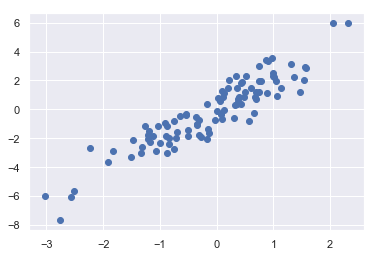

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

plt.scatter(X[:, 0], X[:, 1])

In [26]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([34, 27, 71, 18, 65, 85, 81, 45, 46, 72, 20, 86, 79, 68, 11, 88, 53,
       51, 31, 56])

In [27]:
selection = X[indices]
selection.shape

(20, 2)

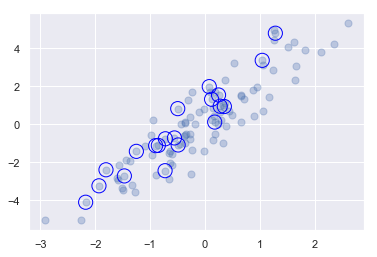

In [38]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3, s=50)
plt.scatter(selection[:, 0], selection[:, 1], facecolor='none', edgecolor='blue',  s=200)

In [39]:
# Modifying Values with Fancy Indexing
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [40]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


In [41]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [42]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
print(x)
# x[i] += 1 is shorthand of x[i] = x[i] + 1
# x[i] is evaluated, and then the result is assigned to the indiceis in x
# not the augmentation that happens multiple times, but the assignment 

[6. 0. 1. 1. 1. 0. 0. 0. 0. 0.]


In [43]:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


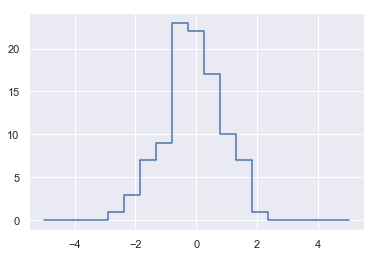

In [53]:
"""Example: Binning Data"""
np.random.seed(42)
x = np.random.randn(100)

# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
# all zeros with the same length as bins
counts = np.zeros_like(bins)

# find the appropriate bin for each x
i = np.searchsorted(bins, x)

# add 1 for each x belongs to the bins
np.add.at(counts, i, 1)

# plot the results
plt.plot(bins, counts, linestyle='steps')

(array([ 0.,  0.,  0.,  0.,  1.,  3.,  7.,  9., 23., 22., 17., 10.,  7.,
         1.,  0.,  0.,  0.,  0.,  0.]),
 array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
        -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
         0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
         2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ]),
 <a list of 1 Patch objects>)

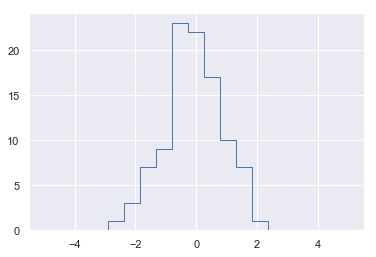

In [54]:
plt.hist(x, bins, histtype='step')